In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
import pandas as pd
plt.rcParams['font.size']=20

/tmp/ipykernel_11240/689808177.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.T.to_latex())
/tmp/ipykernel_11240/689808177.py:38: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.T.to_latex())


\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
{} &   0  &        1  &   2  &   3  &   4  &   5  &   6  &        7  &            8  &        9  &   10 &   11 &   12 &   13 &   14 &        15 \\
\midrule
x[n] &  0.0 &  0.382683 &  0.7 &  0.7 &  0.7 &  0.7 &  0.7 &  0.382683 &  1.224647e-16 & -0.382683 & -0.7 & -0.7 & -0.7 & -0.7 & -0.7 & -0.382683 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
{} &   0  &        1  &   2  &        3  &   4  &        5  &   6  &        7  &   8  &        9  &   10 &        11 &   12 &        13 &   14 &        15 \\
\midrule
Re(X[k]) &  0.0 &  0.000000 &  0.0 &  0.000000 &  0.0 &  0.000000 &  0.0 &  0.000000 &  0.0 &  0.000000 &  0.0 &  0.000000 &  0.0 &  0.000000 &  0.0 &  0.000000 \\
Im(X[k]) &  0.0 & -0.409534 &  0.0 & -0.057662 &  0.0 &  0.014825 &  0.0 &  0.012953 &  0.0 & -0.012953 &  0.0 & -0.014825 &  0.0 &  0.057662 &  0.0 &  0.409534 \\
\bottomrule
\end{tabular}



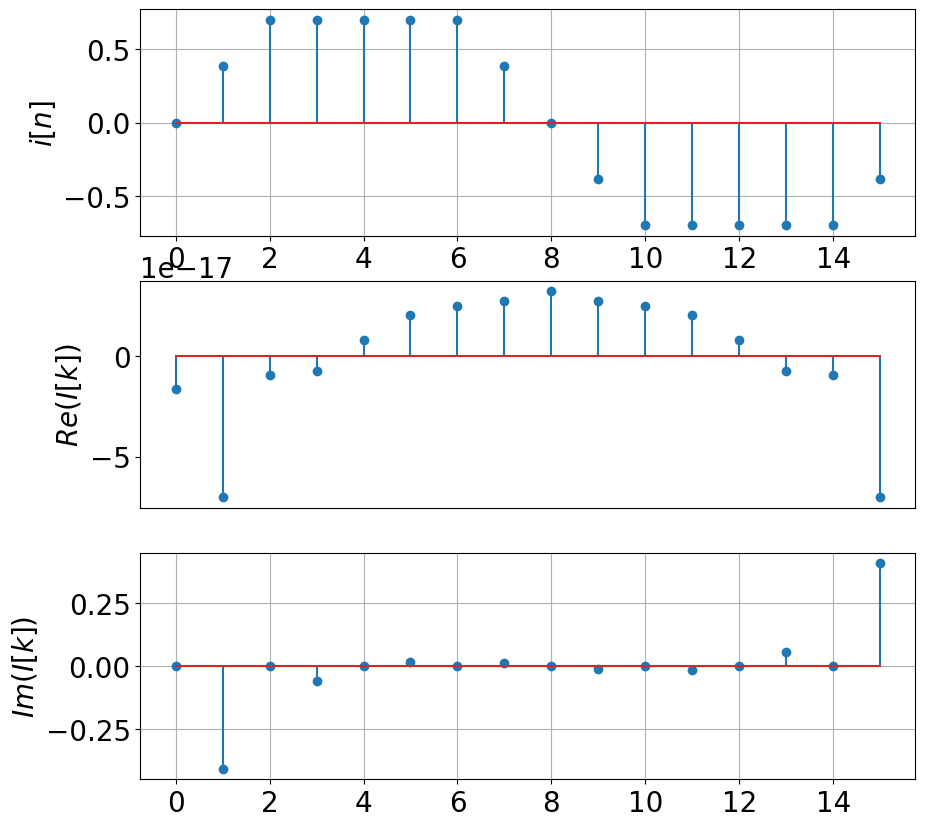

In [12]:
# SERIE FOURIER DISCRETE:
# TOTAL HARMONIC DISTORSION
# 
# 
from scipy.fft import fft, ifft, fftfreq, fftshift
#N = 10; thr=0.75 # 1.
N = 16; thr=0.7 # 2.
n=np.arange(N)
vn = np.sin(2*np.pi/N*n)

idx_vn_pos = vn>thr
idx_vn_neg = vn<-thr
vn[idx_vn_pos]=thr
vn[idx_vn_neg]=-thr

Vk=fft(vn,norm='forward')

fig,ax = plt.subplots(3,1,figsize=(10,10))
ax[0].stem(vn)
ax[0].set_ylabel(r'$i[n]$')
ax[0].grid(True,which='both')
ax[1].stem(np.real(Vk))
ax[1].set_xticks([])
ax[1].set_ylabel(r'$Re(I[k])$')
#ax[1].set_ylim([-20,20])
ax[2].stem(np.imag(Vk))
#ax[2].set_xticks([])
ax[2].set_ylabel(r'$Im(I[k])$')
ax[2].grid(True)

# LATEX
#
df = pd.DataFrame({'x[n]':vn})
print(df.T.to_latex())
#
df = pd.DataFrame({'Re(X[k])':np.real(Vk), 'Im(X[k])':np.imag(Vk) })
df[df.abs()<0.000001]=0
print(df.T.to_latex())


In [13]:
TDH = 100 * np.sqrt(np.sum(np.abs(Vk[2:-1])**2))/( np.sqrt( np.abs(Vk[1])**2 +np.abs(Vk[9])**2 ))
print(TDH)

21.030129235536837


In [6]:
np.sqrt(np.sum(np.abs(np.imag(Vk)[2:-1])**2))

0.06685160335036591

'\nprint(np.imag(Vk[4]))\nprint(np.imag(Vk[12]))\nprint(np.imag(Vk[20]))\nprint(np.imag(Vk[28]))      \n'

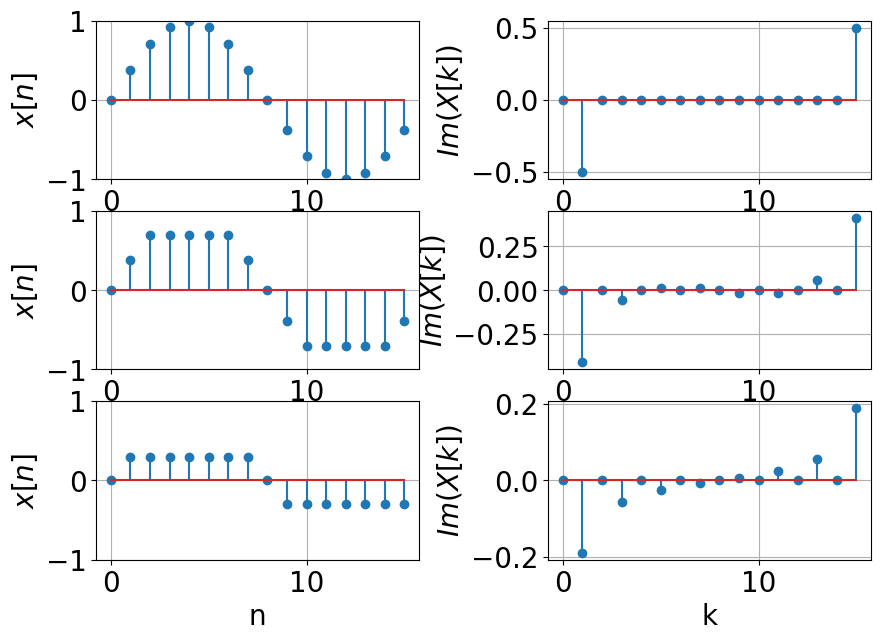

In [6]:
# SERIE FOURIER DISCRETE:
# TOTAL HARMONIC DISTORSION, WITH MORE & MORE DISTORSION
# 
# MATCHED FREQUENCY k=4
from scipy.fft import fft, ifft, fftfreq, fftshift

N=16
n=np.arange(N)
vn = np.sin(2*np.pi/N*n)

fig,ax = plt.subplots(3,2,figsize=(10,7))
thr_l=[1.0,0.7,0.3]
n_thr=len(thr_l)
for i,thr in enumerate(thr_l):
    # truncate
    #thr=0.7
    idx_vn_pos = vn>thr
    idx_vn_neg = vn<-thr
    vn[idx_vn_pos]=thr
    vn[idx_vn_neg]=-thr
    # fft
    Vk=fft(vn,norm='forward')
    # plot

    ax[i,0].stem(n[0:32],vn[0:32])
    ax[i,0].set_ylabel(r'$x[n]$')
    ax[i,0].grid(True,which='both')
    #ax[1].stem(np.real(Vk))
    #ax[1].set_xticks([])
    #ax[1].set_ylabel(r'$Re(I[k])$')
    ax[i,0].set_ylim([-1,1])
    ax[i,1].stem(n[0:32],np.imag(Vk[0:32]))
    if i==n_thr-1: 
        ax[i,0].set_xlabel("n")
        ax[i,1].set_xlabel("k")
    ax[i,1].set_ylabel(r'$Im(X[k])$')
    ax[i,1].grid(True)

plt.subplots_adjust(wspace=0.40)

#glue("fig_sin_THD_more_distorsion", fig, display=False)

"""
print(np.imag(Vk[4]))
print(np.imag(Vk[12]))
print(np.imag(Vk[20]))
print(np.imag(Vk[28]))      
"""

# NOISE

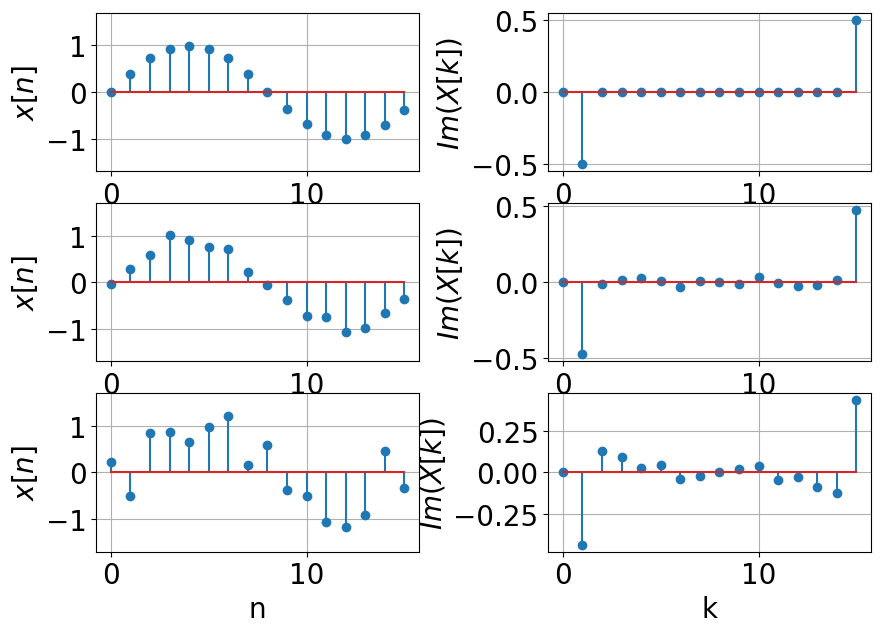

In [11]:
from scipy.fft import fft, ifft, fftfreq, fftshift

N=16
n=np.arange(N)
vn = np.sin(2*np.pi/N*n)

fig,ax = plt.subplots(3,2,figsize=(10,7))
sig_l=[0.01,0.1,0.5]
n_thr=len(sig_l)
for i,sig in enumerate(sig_l):
    # add noise
    noise = sig*np.random.randn(N)
    # fft
    Vk=fft(vn+noise,norm='forward')
    # plot

    ax[i,0].stem(n[0:32],vn+noise)
    ax[i,0].set_ylabel(r'$x[n]$')
    ax[i,0].grid(True,which='both')
    #ax[1].stem(np.real(Vk))
    #ax[1].set_xticks([])
    #ax[1].set_ylabel(r'$Re(I[k])$')
    ax[i,0].set_ylim([-1.7,1.7])
    ax[i,1].stem(n[0:32],np.imag(Vk[0:32]))
    if i==n_thr-1: 
        ax[i,0].set_xlabel("n")
        ax[i,1].set_xlabel("k")
    ax[i,1].set_ylabel(r'$Im(X[k])$')
    ax[i,1].grid(True)

plt.subplots_adjust(wspace=0.40)

REAL SIGNAL
-----------------

In [29]:
# load and extract 1 period
from scipy.io import wavfile
wav_fname = '../../oml3/book/data/vi-1483315200_234072_trim.wav'  # A MODIFIER !!!
samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate
signal= data[0:500, 0].astype(float)

# detect zero-crossing
def detect_zero_crossings(vector, threshold=0):
    # Create an empty list to store the indices of zero-crossings
    zero_crossings = []
    # Loop through the vector elements
    for i in range(1, len(vector)):
        # Check if the current element and the previous element are on opposite sides of the threshold
        if vector[i] * vector[i-1] < 0 and (abs(vector[i] - vector[i-1]) > threshold) and (vector[i]>0):
            zero_crossings.append(i)
    return zero_crossings
# Generate a noisy sine wave
#N = 128; k=4 ; n = np.arange(N) ; signal = np.sin(2*np.pi*k*n/N) 
zc = detect_zero_crossings(signal, threshold=0.0001)
print("Zero-crossings detected at indices:", zc)
# extra
x=signal[76:396]/np.max(signal[76:396])
#x

Zero-crossings detected at indices: [76, 396]


NameError: name 'fft' is not defined

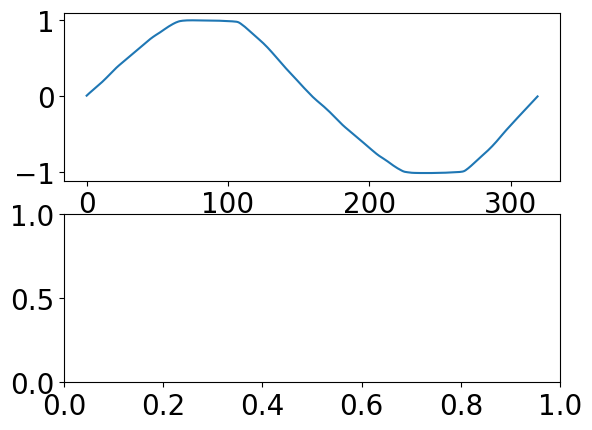

In [30]:
fig,ax = plt.subplots(2,1)
ax[0].plot(x)
Xk = fft(x,norm='forward')
Xk_abs_sq = np.abs(Xk)**2
ax[1].semilogy(np.abs(Xk)**2)
#plt.ylim([0,0.01])
plt.xlim([-1,20])
#Xk_abs_sq[1:-1].sum()
TDH = 100 * np.sqrt(np.sum(np.abs(Xk)[2:-2]**2))/( np.sqrt(2)*np.abs(Xk)[1])
print(TDH)
print(np.sqrt(np.sum(np.abs(Xk)[2:-2])**2))
print(np.sqrt(2)*np.abs(Xk)[1])

In [21]:
signal.astype(float)
#signal.dtype

array([-1.7107e+04, -2.9812e+04, -2.5700e+04, -2.8167e+04, -2.6416e+04,
       -2.7718e+04, -2.6686e+04, -2.7482e+04, -2.6830e+04, -2.7308e+04,
       -2.6916e+04, -2.7175e+04, -2.6962e+04, -2.7059e+04, -2.6980e+04,
       -2.6962e+04, -2.6977e+04, -2.6874e+04, -2.6963e+04, -2.6794e+04,
       -2.6919e+04, -2.6700e+04, -2.6812e+04, -2.6512e+04, -2.6491e+04,
       -2.5975e+04, -2.5772e+04, -2.5190e+04, -2.4931e+04, -2.4338e+04,
       -2.4022e+04, -2.3418e+04, -2.3042e+04, -2.2482e+04, -2.2087e+04,
       -2.1572e+04, -2.1167e+04, -2.0679e+04, -2.0256e+04, -1.9798e+04,
       -1.9337e+04, -1.8882e+04, -1.8371e+04, -1.7896e+04, -1.7338e+04,
       -1.6833e+04, -1.6242e+04, -1.5719e+04, -1.5109e+04, -1.4569e+04,
       -1.3919e+04, -1.3345e+04, -1.2722e+04, -1.2182e+04, -1.1583e+04,
       -1.1042e+04, -1.0456e+04, -9.9290e+03, -9.3670e+03, -8.8470e+03,
       -8.3040e+03, -7.7840e+03, -7.2490e+03, -6.7130e+03, -6.1590e+03,
       -5.6160e+03, -5.0680e+03, -4.5100e+03, -3.9560e+03, -3.39